In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | sarangani
Processing Record 3 of Set 1 | adrar
Processing Record 4 of Set 1 | hokitika
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | merrill
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | fare
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | hobyo
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | asau
Processing Record 14 of Set 1 | loukhi
Processing Record 15 of Set 1 | saint-georges
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | kefalos
Processing Record 23 of Set 1 | xiangxiang
Processi

Processing Record 38 of Set 4 | komsomolskiy
Processing Record 39 of Set 4 | ye
City not found. Skipping...
Processing Record 40 of Set 4 | narathiwat
Processing Record 41 of Set 4 | garoua boulai
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | teano
Processing Record 47 of Set 4 | kano
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | lamu
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | kosh-agach
Processing Record 2 of Set 5 | berezovyy
Processing Record 3 of Set 5 | bagdarin
Processing Record 4 of Set 5 | sao joao da barra
Processing Record 5 of Set 5 | kaeo
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | khorramshahr
Processing Record 8 of Set 5 | nantucket
Processing Record 9 of Set 5 | kotma
Processing Record 10 of Set 5 | chickasha
Processing 

Processing Record 27 of Set 8 | high level
Processing Record 28 of Set 8 | mariental
Processing Record 29 of Set 8 | xinqing
Processing Record 30 of Set 8 | samarai
Processing Record 31 of Set 8 | kondinskoye
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 34 of Set 8 | pontianak
Processing Record 35 of Set 8 | maragogi
Processing Record 36 of Set 8 | flinders
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | constitucion
Processing Record 39 of Set 8 | bar harbor
Processing Record 40 of Set 8 | gravdal
Processing Record 41 of Set 8 | kruisfontein
Processing Record 42 of Set 8 | ishigaki
Processing Record 43 of Set 8 | filimonovo
Processing Record 44 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 45 of Set 8 | rio cuarto
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | ko samui
Processing Record 48 of Set 8 | kurilsk
Processing Record 

Processing Record 15 of Set 12 | khormuj
City not found. Skipping...
Processing Record 16 of Set 12 | cap-aux-meules
Processing Record 17 of Set 12 | baiyin
Processing Record 18 of Set 12 | cordoba
Processing Record 19 of Set 12 | diffa
Processing Record 20 of Set 12 | eldikan
City not found. Skipping...
Processing Record 21 of Set 12 | mahebourg
Processing Record 22 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 23 of Set 12 | rong kwang
Processing Record 24 of Set 12 | am timan
Processing Record 25 of Set 12 | tabas
Processing Record 26 of Set 12 | satitoa
City not found. Skipping...
Processing Record 27 of Set 12 | vitim
Processing Record 28 of Set 12 | gastonia
Processing Record 29 of Set 12 | muroto
Processing Record 30 of Set 12 | dunedin
Processing Record 31 of Set 12 | ilhabela
Processing Record 32 of Set 12 | bolshoy kamen
Processing Record 33 of Set 12 | san vicente
Processing Record 34 of Set 12 | bogorodskoye
Processing Record 35 of Set 12 | payao
P

In [19]:
len(city_data)

572

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,50.22,43,2,4.88,GL,2022-06-13 17:48:51
1,Sarangani,5.4033,125.4636,83.39,69,98,2.62,PH,2022-06-13 17:48:51
2,Adrar,20.5022,-10.0711,101.95,15,36,6.24,MR,2022-06-13 17:48:52
3,Hokitika,-42.7167,170.9667,51.82,77,87,27.25,NZ,2022-06-13 17:48:54
4,Guerrero Negro,27.9769,-114.0611,70.68,64,53,15.01,MX,2022-06-13 17:46:38
5,Merrill,45.1805,-89.6835,62.37,85,100,4.00,US,2022-06-13 17:47:32
6,Jamestown,42.0970,-79.2353,80.53,10,34,6.20,US,2022-06-13 17:48:54
7,Rikitea,-23.1203,-134.9692,73.18,65,18,10.76,PF,2022-06-13 17:44:18
8,Fare,-16.7000,-151.0167,79.38,68,37,20.40,PF,2022-06-13 17:48:55
9,Aklavik,68.2191,-135.0107,48.92,54,97,7.38,CA,2022-06-13 17:48:55


In [21]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [24]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-06-13 17:48:51,60.9167,-46.0500,50.22,43,2,4.88
1,Sarangani,PH,2022-06-13 17:48:51,5.4033,125.4636,83.39,69,98,2.62
2,Adrar,MR,2022-06-13 17:48:52,20.5022,-10.0711,101.95,15,36,6.24
3,Hokitika,NZ,2022-06-13 17:48:54,-42.7167,170.9667,51.82,77,87,27.25
4,Guerrero Negro,MX,2022-06-13 17:46:38,27.9769,-114.0611,70.68,64,53,15.01
...,...,...,...,...,...,...,...,...,...
567,Bintulu,MY,2022-06-13 18:07:25,3.1667,113.0333,75.33,92,100,4.14
568,Ulety,RU,2022-06-13 18:07:26,51.3572,112.4849,52.56,61,56,2.95
569,Anadyr,RU,2022-06-13 18:07:27,64.7500,177.4833,42.01,56,44,11.01
570,Sorland,NO,2022-06-13 18:07:27,67.6670,12.6934,48.06,94,100,18.95


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

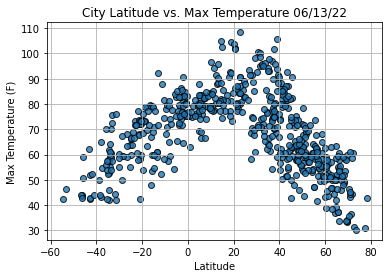

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

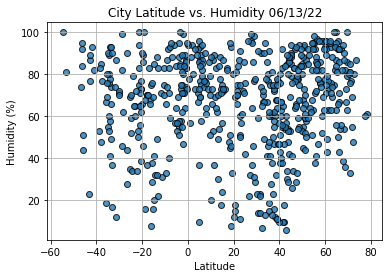

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

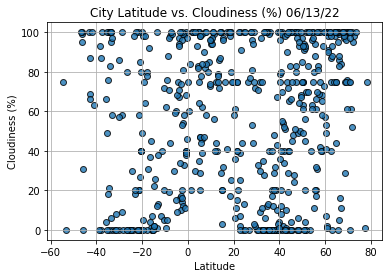

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

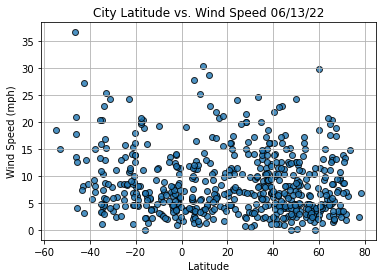

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()